<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-1-Sprint-2-Statistics/blob/master/Mountain_Scott_DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import re 

text ="""A1: b, a.
A2: continuous.
A3: continuous.
A4: u, y, l, t.
A5: g, p, gg.
A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
A7: v, h, bb, j, n, z, dd, ff, o.
A8: continuous.
A9: t, f.
A10: t, f.
A11: continuous.
A12: t, f.
A13: g, p, s.
A14: continuous.
A15: continuous.
A16: +,- (class attribute)
"""
pattern = re.compile("A\d+(?=:)")

col_names = re.findall(pattern, text)



In [0]:
import pandas as pd 
import numpy as np

pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names = col_names)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names = col_names)

In [0]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     690 non-null object
A2     690 non-null object
A3     690 non-null float64
A4     690 non-null object
A5     690 non-null object
A6     690 non-null object
A7     690 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    690 non-null object
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


**missing values not in standard form; 2,3,8,11,14,15 can be changed to float** 

In [0]:
df.sample(50)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
275,b,18.58,5.710,u,g,d,v,0.540,f,f,0,f,g,00120,0,-
328,b,34.83,2.500,y,p,w,v,3.000,f,f,0,f,s,00200,0,-
176,b,25.00,12.500,u,g,aa,v,3.000,t,f,0,t,s,00020,0,+
172,b,56.00,12.500,u,g,k,h,8.000,t,f,0,t,g,00024,2028,+
68,b,19.42,6.500,u,g,w,h,1.460,t,t,7,f,g,00080,2954,+
471,b,21.08,4.125,y,p,i,h,0.040,f,f,0,f,g,00140,100,-
440,b,23.08,0.000,u,g,k,v,1.000,f,t,11,f,s,00000,0,-
69,b,35.17,25.125,u,g,x,h,1.625,t,t,1,t,g,00515,500,+
639,b,35.58,0.750,u,g,k,v,1.500,f,f,0,t,g,00231,0,-
142,b,43.00,0.290,y,p,cc,h,1.750,t,t,8,f,g,00100,375,+


In [0]:
df = df.replace("?", np.nan)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null object
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null object
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


**A1, A2, A4-A7, and A14 have missing values**

In [0]:
subset_to_change = "A2,A3,A8,A11,A14,A15".split(",")

In [0]:
df[subset_to_change]=df[subset_to_change].astype('float')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.4+ KB


**all continuous columns are now floats**

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline



In [0]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [0]:
#A15 has a relatively large variance as can be inferred from the std and from the difference between the median and the max value

In [0]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [0]:
df.query('A16 == "+"')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,b,20.50,2.415,u,g,c,v,2.00,t,t,11.0,t,g,200.0,3000.0,+
600,a,29.50,0.460,u,g,k,v,0.54,t,t,4.0,f,g,380.0,500.0,+
606,b,16.17,0.040,u,g,c,v,0.04,f,f,0.0,f,g,0.0,0.0,+
621,b,22.67,0.165,u,g,c,j,2.25,f,f,0.0,t,s,0.0,0.0,+


In [0]:
approved = df.query('A16 == "+"')

In [0]:
df.query('A16 == "-"')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.500,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.000,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.500,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.000,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0.0,f,g,260.0,0.0,-
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2.0,t,g,200.0,394.0,-
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1.0,t,g,200.0,1.0,-
688,b,17.92,0.205,u,g,aa,v,0.040,f,f,0.0,f,g,280.0,750.0,-


In [0]:
denied = df.query('A16 == "-"')

In [0]:
denied.describe()

,A2,A3,A8,A11,A14,A15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [0]:
approved.describe()

,A2,A3,A8,A11,A14,A15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


###Excluding columns A15 and A14, It's possible that higher values in numeric columns correlate with approval

In [0]:
from scipy.stats import ttest_ind

In [0]:
#A11 and A15 are clear candidates for being "extremely different" based on difference in mean and std between dataframes

###null hypothesis:  There is no significant difference in the sample means of "A15" of the approved vs denied dataframes




In [0]:
ttest_ind(approved.A11.dropna(), denied.A11.dropna())

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

In [0]:
len(denied.A15.dropna())

383

In [0]:
len(approved.A15.dropna())   #lower length - 1 chosen

307

Due to observing a t-statistic of **11.667004222431277** and a resulting p value of  **7.95 * 10^-29** 
we reject the null hypothesis that there is no significant difference in the sample mean value between approval and denial in reference to the feature "A15" and suggest the alternative hypothesis that there is a significant difference. 

In [0]:
#The A2 column in both dataframes have similar means (though their stds are a bit different)

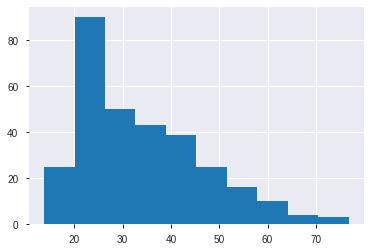

In [0]:
approved.A2.hist()

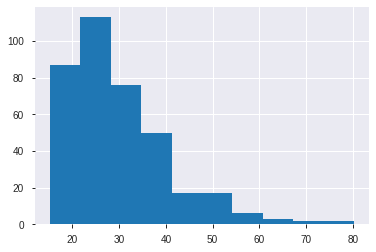

In [0]:
denied.A2.hist()

###null hypothesis:  There is no significant difference in the sample means of "A14" of the approved vs denied dataframes




In [0]:
ttest_ind(approved.A14.dropna(), denied.A14.dropna())

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473980122)

In [0]:
len(approved.A14.dropna())

301

In [0]:
len(denied.A14.dropna())

376

Due to observing a t-statistic of **-2.6358251986645476** and a resulting p value of  **0.008586135473980122** 
we reject the null hypothesis that there is no significant difference in the sample mean value between approval and denial in reference to the feature "A14" and suggest the alternative hypothesis that there is a significant difference. 

#Chi^2  section

In [0]:
from scipy.stats import chisquare 
import scipy.stats as stats

In [0]:
df.info()  #A1, A4, A5, A6, A7, A9, A10, A12, A13, A16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.4+ KB


In [0]:
ct1 = pd.crosstab(df.A16, df.A1)

In [0]:
ct2 = pd.crosstab(df.A16, df.A4)

In [0]:
ct3 = pd.crosstab(df.A16, df.A5)

In [0]:
ct4=pd.crosstab(df.A16, df.A6)

In [0]:
ct5=pd.crosstab(df.A16, df.A7)

In [0]:
ct6=pd.crosstab(df.A16, df.A9)

In [0]:
ct7=pd.crosstab(df.A16, df.A10)

In [0]:
ct8=pd.crosstab(df.A16, df.A12)

In [0]:
ct9=pd.crosstab(df.A16, df.A13)

In [0]:
chi_2_stat, p_value, dof, expected = stats.chi2_contingency(ct1)

In [0]:
p_value  #**

0.5768937883001117

In [0]:
chi_2_stat, p_value, dof, expected = stats.chi2_contingency(ct2)

In [0]:
p_value

2.010680204180363e-06

In [0]:
chi_2_stat, p_value, dof, expected = stats.chi2_contingency(ct3)

In [0]:
p_value

2.010680204180363e-06

In [0]:
chi_2_stat, p_value, dof, expected = stats.chi2_contingency(ct4)

In [0]:
p_value

3.4999300402715717e-15

In [0]:
chi_2_stat, p_value, dof, expected = stats.chi2_contingency(ct5)

In [0]:
p_value

3.625452872372267e-07

In [0]:
chi_2_stat, p_value, dof, expected = stats.chi2_contingency(ct6)

In [0]:
p_value  #**

3.1185900878457007e-79

In [0]:
chi_2_stat, p_value, dof, expected = stats.chi2_contingency(ct7)

In [0]:
p_value

5.675727374527571e-33

In [0]:
chi_2_stat, p_value, dof, expected = stats.chi2_contingency(ct8)

In [0]:
p_value   

0.45094587758631943

In [0]:
chi_2_stat, p_value, dof, expected = stats.chi2_contingency(ct9)

In [0]:
p_value

0.010094291370456362

Based on a p value of 0.5768937883001117, I fail to reject the null hypothesis that A16 and A1 are independent.

Based on a p value of 3.1185900878457007e-79, I reject the null hypothesis that A16 and A9 are independent, and suggest the alternative that they are associated.

In [0]:
from pandas_profiling import ProfileReport


profile = ProfileReport(approved)
profile2 = ProfileReport(denied)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)
/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
profile

Number of variables,17
Number of observations,307
Total Missing (%),0.5%
Total size in memory,40.9 KiB
Average record size in memory,136.4 B
Numeric,7
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [0]:
profile2

Number of variables,17
Number of observations,383
Total Missing (%),0.6%
Total size in memory,51.0 KiB
Average record size in memory,136.3 B
Numeric,7
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Boilerplate statements concerning the results of the most and least extreme chi and t test p values can be found immediately after the pertinent code. 



In [0]:
df2 = df.copy()

In [0]:
df2['encoded_A16'] = df2.A16.replace({"+": 1, "-":0 })

In [0]:

df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,encoded_A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+,1


In [0]:
df2.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,encoded_A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0.0,f,g,260.0,0.0,-,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2.0,t,g,200.0,394.0,-,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1.0,t,g,200.0,1.0,-,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0.0,f,g,280.0,750.0,-,0
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0.0,t,g,0.0,0.0,-,0


In [0]:
df2.corr().loc["encoded_A16"]

A2             0.162881
A3             0.206294
A8             0.322475
A11            0.406410
A14           -0.100935
A15            0.175657
encoded_A16    1.000000
Name: encoded_A16, dtype: float64

###Interpretations of the pearson r coefficient vary based on field (e.g. economics vs physics) and context.  I can only say that columns A8 and A11 appear to be the most positively correlated with the final loan/credit decision (whether the individual was approved or denied). 



In [0]:
df2.query("A16=='+'").describe().loc["mean"]

A2               33.720492
A3                5.904951
A8                3.427899
A11               4.605863
A14             164.421927
A15            2038.859935
encoded_A16       1.000000
Name: mean, dtype: float64

In [0]:
df2.query("A16=='+'").describe().loc["std"]

A2               12.809641
A3                5.471485
A8                4.120792
A11               6.320242
A14             161.770675
A15            7659.763941
encoded_A16       0.000000
Name: std, dtype: float64

In [0]:
df2.query("A16=='-'").describe().loc["mean"]

A2              29.808231
A3               3.839948
A8               1.257924
A11              0.631854
A14            199.699468
A15            198.605744
encoded_A16      0.000000
Name: mean, dtype: float64

In [0]:
df2.query("A16=='-'").describe().loc["std"]

A2              10.919291
A3               4.337662
A8               2.120481
A11              1.900049
A14            181.564835
A15            671.608839
encoded_A16      0.000000
Name: std, dtype: float64

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.